# Correlate topic mixtures from MixEHR with ventilation duration
Here different categories (e.g. physician, nurse) are treated as different data types.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
import os
%matplotlib inline

## Read data

In [3]:
# for cross validation datasets
data_path = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2_cv'
fold_dfs = [pd.read_csv(os.path.join(data_path, 'infer', 'f' + str(idx) + '.csv'), header=None) for idx in range(1, 6)]
fold_dfs = [pd.DataFrame(normalize(fold_df.iloc[:,0:51], norm='l1', axis=1)) for fold_df in fold_dfs]
bi_durations = [pd.read_csv(os.path.join(data_path, 'f' + str(idx) + '_bi_vent.txt') , header=None, sep=' ') for idx in range(1, 6)] 
bi_durations = [binary_duration[1].astype(int) for binary_duration in bi_durations]
mixtures = pd.concat(fold_dfs, ignore_index=True)
binary_duration = pd.concat(bi_durations, ignore_index=True)

In [114]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48/infer/train_topics.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48/train_vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)
# binary_duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48//train_bi_vent.txt', header=None, sep=' ')
# binary_duration = binary_duration[1].astype(int)

In [115]:
print(duration.shape)
# print(binary_duration.shape)
print(mixtures.shape)

(1233,)
(1233, 50)


In [116]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.129941,0.274401,1.358556,0.273798,1.087154,0.314356,3.025618,15.420935,0.312452,3.912363,...,15.601606,2.307766,3.143841,3.670899,1.517998,0.384671,0.305688,42.488261,100.856903,6.817440
1,0.421864,0.138054,0.350621,2.464375,1.429933,0.127961,2.145749,1.418313,0.435347,120.093321,...,97.431829,2.051048,1.376759,0.541885,0.094458,0.082534,0.233221,0.537403,0.395342,0.825123
2,1.830491,0.966141,8.003215,0.782954,2.179948,70.451731,0.077392,10.355591,16.299213,1.863593,...,0.765069,0.312041,0.193189,0.740490,1.338808,0.275185,73.429167,0.306938,0.201400,0.339517
3,0.478385,0.555676,7.008054,4.228558,4.361622,6.968557,2.106957,15.068294,11.752822,17.071710,...,0.336485,56.802797,1.428947,3.423297,54.312036,1.183303,0.389929,3.050380,0.872747,0.537862
4,0.110099,1.999215,0.930120,47.089720,3.610418,1.668587,0.186918,10.501396,40.762105,32.671139,...,1.041798,0.302472,4.416525,46.959126,146.789238,0.133521,0.368301,0.227217,2.832592,32.908140


In [117]:
duration.head()

0     46.250000
1    155.716667
2     21.850000
3    299.683333
4    230.000000
Name: 1, dtype: float64

## Normalize

In [137]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,0:51], norm='l1', axis=1))
# normed_mixtures.columns = [str(idx) for idx in range(50)]

In [138]:
mixtures.sum(axis=1)

0       1267.0
1        868.0
2       1560.0
3        764.0
4        638.0
         ...  
1228     906.0
1229     520.0
1230     519.0
1231     606.0
1232    2204.0
Length: 1233, dtype: float64

## See if mixture's rows sum up to 1

In [139]:
normed_mixtures.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1228    1.0
1229    1.0
1230    1.0
1231    1.0
1232    1.0
Length: 1233, dtype: float64

## Heatmap

In [140]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000103,0.000217,0.001072,0.000216,0.000858,0.000248,0.002388,0.012171,0.000247,0.003088,...,0.012314,0.001821,0.002481,0.002897,0.001198,0.000304,0.000241,0.033535,0.079603,0.005381
1,0.000486,0.000159,0.000404,0.002839,0.001647,0.000147,0.002472,0.001634,0.000502,0.138356,...,0.112249,0.002363,0.001586,0.000624,0.000109,0.000095,0.000269,0.000619,0.000455,0.000951
2,0.001173,0.000619,0.005130,0.000502,0.001397,0.045161,0.000050,0.006638,0.010448,0.001195,...,0.000490,0.000200,0.000124,0.000475,0.000858,0.000176,0.047070,0.000197,0.000129,0.000218
3,0.000626,0.000727,0.009173,0.005535,0.005709,0.009121,0.002758,0.019723,0.015383,0.022345,...,0.000440,0.074349,0.001870,0.004481,0.071089,0.001549,0.000510,0.003993,0.001142,0.000704
4,0.000173,0.003134,0.001458,0.073808,0.005659,0.002615,0.000293,0.016460,0.063890,0.051209,...,0.001633,0.000474,0.006922,0.073604,0.230077,0.000209,0.000577,0.000356,0.004440,0.051580


In [9]:
sorted_normed_mixtures = normed_mixtures.sort_values(by='5', ascending=False)

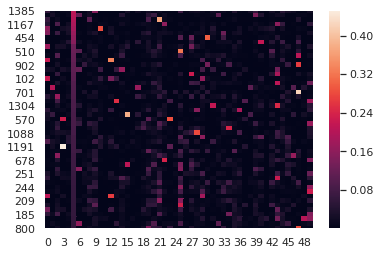

In [10]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

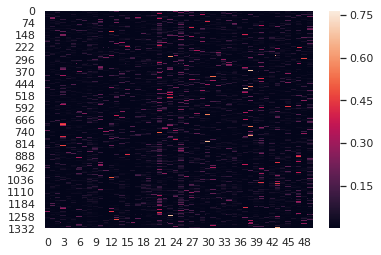

In [11]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [141]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [142]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

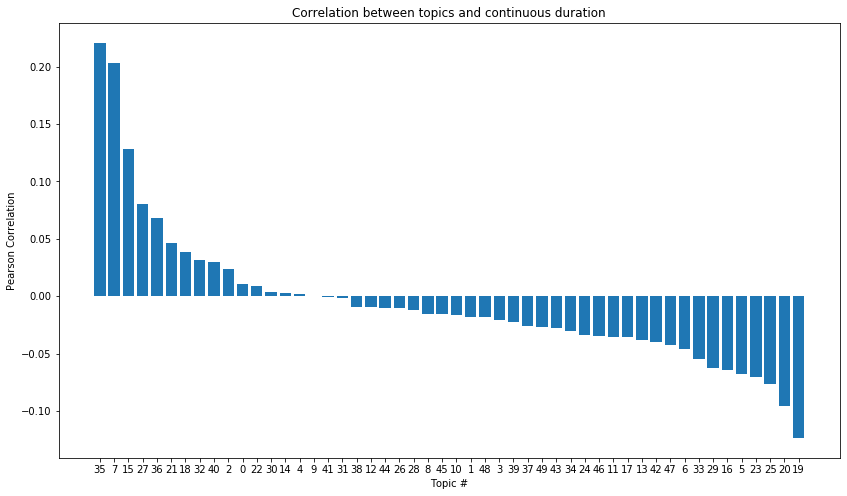

In [143]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

### Compute correlation with death

In [ ]:
d2_df = pd.read_csv('/home/mcb/li_lab/pnair6/mimic/data/d2_phy_nurse_resp_6Nov19.csv')

In [281]:
death_7_df = d2_df[d2_df['DEATH'] == 1]['HADM_ID'].drop_duplicates()

In [282]:
death_7_df.shape

(191,)

In [174]:
train_df = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48/train_notes.csv', header=None)

In [175]:
train_df.columns = ['HADM_ID', 'CATEGORY', 'TEXT', 'PROCTEXT', 'STARTTIME', 'ENDTIME', 'DURATION']
train_df.head()

,HADM_ID,CATEGORY,TEXT,PROCTEXT,STARTTIME,ENDTIME,DURATION
0,111846.0,Nursing,this year old male patient was admitted to osh...,year old male patient admitted osh ed septic s...,2115-06-29 10:30:00,2115-07-01 08:45:00,46.250000
1,171753.0,Nursing,f with no pmhx sp mva accident and tib fib fx ...,f pmhx sp mva accident tib fib fx transferred ...,2191-05-31 21:00:00,2191-06-07 08:43:00,155.716667
2,191708.0,Nursing,yr old with dm called ems today complaining of...,yr old dm called ems today complaining diaphor...,2201-02-06 01:09:00,2201-02-06 23:00:00,21.850000
3,116624.0,Nursing,pt admitted to hospital after being found down...,pt admitted hospital found husband mentally ch...,2114-07-21 16:19:00,2114-08-03 04:00:00,299.683333
4,172462.0,Nursing,yo female from where she had presentation with...,yo female presentation worsening hypoxemia pro...,2190-04-08 20:00:00,2190-04-18 10:00:00,230.000000


In [288]:
death = train_df['HADM_ID'].isin(death_7_df.tolist()).astype(int)

In [290]:
death.shape

(1233,)

In [291]:
death_corr = normed_mixtures.apply(lambda mixture: mixture.corr(death, method='pearson'))

In [294]:
death_corr_sorted = death_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

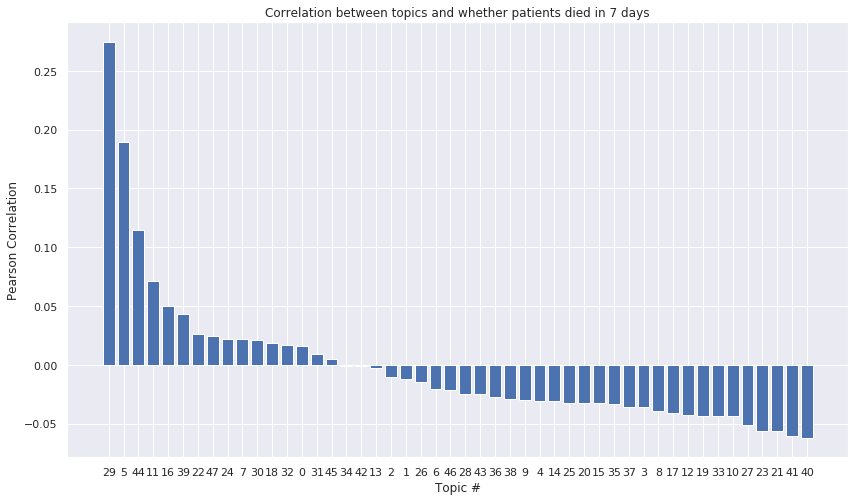

In [295]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(death_corr)), height=death_corr_sorted)
plt.title('Correlation between topics and whether patients died in 7 days')
plt.xlabel('Topic #')
plt.xticks(range(len(death_corr)), death_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [144]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [145]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [146]:
top_neg

[19, 20, 25]

In [147]:
top_topics = top_pos + top_neg
top_topics

[35, 7, 15, 19, 20, 25]

## Extract top words in those top topics

In [132]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/data_JCVB0_nmar_K50_iter610_phi_normalized.csv', header=None)


In [133]:
phis_df.columns = ['CATEGORY', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [134]:
phis_df.head()

,CATEGORY,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,0.000445,2.752510e-04,0.000027,0.000004,6.078070e-04,0.000004,0.000096,7.552510e-06,...,0.000008,4.144130e-06,0.000012,0.000004,0.000011,1.870730e-04,0.000137,1.560180e-04,0.000007,0.000081
1,1,1,0.000304,5.427160e-04,0.000377,0.000002,2.084120e-06,0.000002,0.000019,1.084400e-06,...,0.000003,1.035460e-06,0.000003,0.000002,0.000002,1.299710e-06,0.000002,2.449880e-06,0.000003,0.000002
2,1,2,0.000001,6.691100e-07,0.000001,0.000001,9.148750e-07,0.000001,0.000001,7.926560e-07,...,0.000059,6.712320e-07,0.000001,0.000001,0.000092,9.802320e-07,0.000001,9.054080e-07,0.000001,0.000152
3,1,3,0.000007,1.160550e-04,0.000002,0.000002,4.132020e-05,0.000002,0.000003,1.086890e-06,...,0.000003,2.245100e-05,0.000002,0.000033,0.000002,1.411270e-06,0.000001,5.515300e-05,0.000002,0.000015
4,1,4,0.000002,1.865250e-06,0.000190,0.000003,2.928990e-06,0.000057,0.000172,1.782350e-06,...,0.000009,1.392170e-05,0.000005,0.000058,0.000004,4.093330e-06,0.000002,6.407950e-06,0.000336,0.000004


In [148]:
cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in top_topics]

In [149]:
top_phis_df = phis_df[cols]

In [150]:
top_phis_df.shape

(22061, 8)

In [151]:
top_phis_df.head()

,CATEGORY,WORD_ID,35,7,15,19,20,25
0,1,0,0.000626,7.552510e-06,0.000018,0.000028,5.435880e-05,0.000098
1,1,1,0.000001,1.084400e-06,0.000002,0.000002,5.156330e-06,0.000002
2,1,2,0.000185,7.926560e-07,0.000001,0.000110,8.962040e-07,0.000001
3,1,3,0.000048,1.086890e-06,0.000002,0.000001,5.082660e-06,0.000002
4,1,4,0.000002,1.782350e-06,0.000019,0.000125,3.563580e-05,0.000088


In [101]:
vocab_df_1 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/1_vocab.txt', header=None)
vocab_df_2 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/2_vocab.txt', header=None)
# vocab_df_3 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/3_vocab.txt', header=None)

In [103]:
vocab_df_1.columns = ['WORD', 'WORD_ID']
vocab_df_2.columns = ['WORD', 'WORD_ID']
# vocab_df_3.columns = ['WORD', 'WORD_ID']

In [104]:
vocab_df_1.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aado,2
3,aao,3
4,aaox,4


In [152]:
vocab_dfs = {1: vocab_df_1, 2: vocab_df_2}

In [153]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)
top_types_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in top_topics]
top_types = []
for sublist in top_types_bytopic:
    for cat in sublist:
        top_types.append(cat)

In [154]:
top_phis_df[(top_phis_df['CATEGORY'] == top_types[-1]) & (top_phis_df['WORD_ID'] == top_words[-1])]

,CATEGORY,WORD_ID,35,7,15,19,20,25
19477,2,7567,0.000089,0.000021,0.000282,0.00001,0.000257,0.015031


In [155]:
word_topic_matrix = pd.DataFrame(columns=top_phis_df.keys())
for idx in range(len(top_types)):
    cat = top_types[idx]
    word_id = top_words[idx]
    word_topic_matrix = pd.concat([word_topic_matrix, top_phis_df[(top_phis_df['CATEGORY'] == cat) & (top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [156]:
word_topic_matrix.shape

(60, 8)

In [157]:
word_topic_matrix.head()

,CATEGORY,WORD_ID,35,7,15,19,20,25
0,2,6656,0.020179,0.000006,0.000012,0.001931,0.002997,0.001154
1,1,11473,0.011752,0.000176,0.002627,0.001866,0.000063,0.000005
2,2,6643,0.011609,0.000249,0.000881,0.003611,0.003690,0.000997
3,1,700,0.011114,0.007703,0.000686,0.000002,0.000009,0.000004
4,1,7675,0.010402,0.000491,0.000745,0.001662,0.000902,0.000019


In [158]:
# categories and type ids
id_to_category = {
    1: 'physician',
    2: 'nursing',
    3: 'respiratory',
}

In [159]:
yticklabels = []
for idx, word_id in enumerate(top_words):
    vocab_df = vocab_dfs[top_types[idx]]
    yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
# xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']
xticklabels = [str(topic) + '(pos)' for topic in top_topics[0:3]] + [str(topic) + '(neg)' for topic in top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with continuous duration')

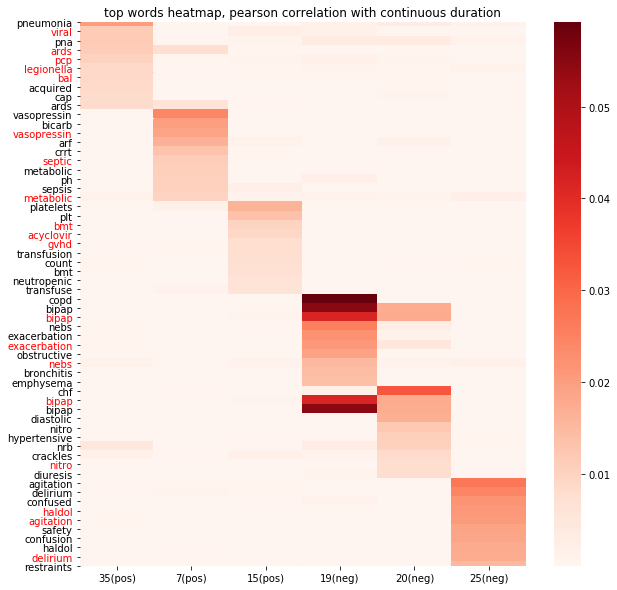

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 2:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, pearson correlation with continuous duration')

In [171]:
train_note_df.columns = ['HADM_ID', 'CATEGORY', 'ALL_TEXT', 'PROC_TEXT', 'STARTTIME', 'ENDTIME', 'DURATION']

In [176]:
train_df

,HADM_ID,CATEGORY,TEXT,PROCTEXT,STARTTIME,ENDTIME,DURATION
0,111846.0,Nursing,this year old male patient was admitted to osh...,year old male patient admitted osh ed septic s...,2115-06-29 10:30:00,2115-07-01 08:45:00,46.250000
1,171753.0,Nursing,f with no pmhx sp mva accident and tib fib fx ...,f pmhx sp mva accident tib fib fx transferred ...,2191-05-31 21:00:00,2191-06-07 08:43:00,155.716667
2,191708.0,Nursing,yr old with dm called ems today complaining of...,yr old dm called ems today complaining diaphor...,2201-02-06 01:09:00,2201-02-06 23:00:00,21.850000
3,116624.0,Nursing,pt admitted to hospital after being found down...,pt admitted hospital found husband mentally ch...,2114-07-21 16:19:00,2114-08-03 04:00:00,299.683333
4,172462.0,Nursing,yo female from where she had presentation with...,yo female presentation worsening hypoxemia pro...,2190-04-08 20:00:00,2190-04-18 10:00:00,230.000000
...,...,...,...,...,...,...,...
1228,119848.0,Nursing,f with chronic alcoholic pancreatitis transfer...,f chronic alcoholic pancreatitis transferred o...,2132-10-12 19:00:00,2132-10-28 04:00:00,369.000000
1229,184966.0,Nursing,altered mental status not delirium assessment ...,altered mental status delirium assessment acti...,2139-05-22 09:17:00,2139-06-02 10:30:00,265.216667
1230,194201.0,Nursing,trauma sp assessment pt alert and nodding appr...,trauma sp assessment pt alert nodding appropri...,2138-11-03 11:00:00,2138-11-07 10:00:00,95.000000
1231,180806.0,Nursing,yo m with hx of severe copd sp trach and recen...,yo hx severe copd sp trach recent prolonged ho...,2126-11-10 18:30:00,2126-11-12 12:00:00,41.500000


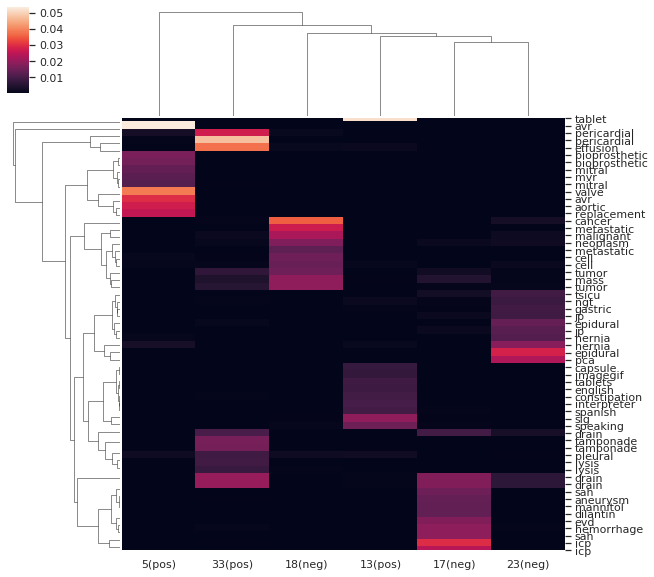

In [229]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 2:], yticklabels=yticklabels, xticklabels=xticklabels)

### Output entire heatmap

In [43]:
entire_top_words_bytopic = [phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:25] for topic in range(50)]
entire_top_words = []
for sublist in entire_top_words_bytopic:
    for word in sublist:
        entire_top_words.append(word)

In [44]:
entire_word_topic_matrix = phis_df.iloc[[word_id for word_id in entire_top_words]]

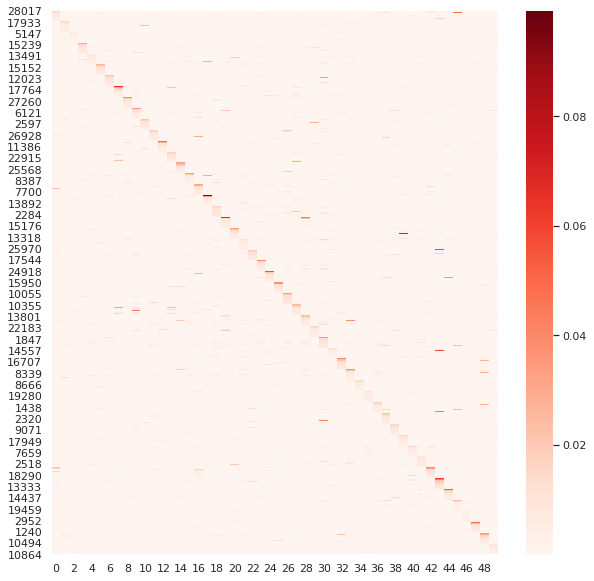

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(entire_word_topic_matrix.iloc[:, 2:], cmap='Reds')

## Binary duration
Threshold at 7 day

In [230]:
binary_duration = (duration > 7 * 24).astype(int)

In [17]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [18]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

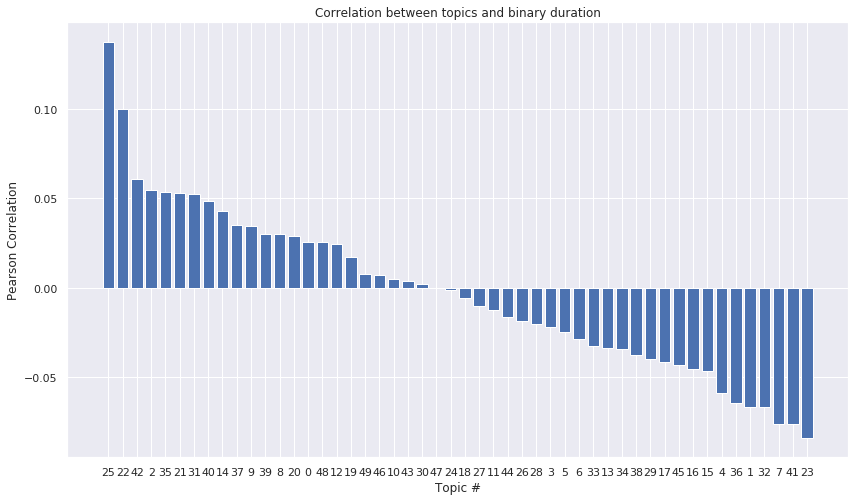

In [14]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [25]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [26]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [27]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[25, 22, 42, 23, 41, 7]

## Extract top words in those top topics

In [28]:
bi_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in bi_top_topics]

In [29]:
bi_top_phis_df = phis_df[bi_cols]

In [30]:
bi_top_phis_df.head()

,CATEGORY,WORD_ID,25,22,42,23,41,7
0,1,0,5.284540e-04,3.131830e-04,0.000381,0.000006,0.000005,6.287730e-05
1,1,1,2.308220e-06,6.167240e-05,0.000005,0.000008,0.000568,2.040350e-06
2,1,2,8.374050e-07,8.192870e-07,0.000001,0.000001,0.000001,7.487730e-07
3,1,3,1.880380e-06,1.856510e-06,0.000003,0.000076,0.000043,1.704780e-06
4,1,4,6.855270e-06,2.533520e-05,0.000154,0.000265,0.000036,4.341600e-06


In [31]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)
bi_top_types_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in bi_top_topics]
bi_top_types = []
for sublist in bi_top_types_bytopic:
    for cat in sublist:
        bi_top_types.append(cat)

In [32]:
bi_word_topic_matrix = pd.DataFrame(columns=bi_top_phis_df.keys())
for idx in range(len(bi_top_types)):
    cat = bi_top_types[idx]
    word_id = bi_top_words[idx]
    bi_word_topic_matrix = pd.concat([bi_word_topic_matrix, bi_top_phis_df[(bi_top_phis_df['CATEGORY'] == cat) & \
                                                                           (bi_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [33]:
bi_word_topic_matrix.head()

,CATEGORY,WORD_ID,25,22,42,23,41,7
0,3,222,0.024267,0.000180,0.004473,0.000122,0.000290,0.000193
1,3,352,0.022159,0.007241,0.001054,0.013418,0.008208,0.000588
2,3,1155,0.017531,0.000205,0.012447,0.000178,0.018254,0.005730
3,3,110,0.016422,0.000150,0.007273,0.000106,0.000637,0.003576
4,3,863,0.014030,0.005071,0.011775,0.006240,0.002402,0.004917


In [34]:
bi_yticklabels = []
for idx, word_id in enumerate(bi_top_words):
    vocab_df = vocab_dfs[bi_top_types[idx]]
    bi_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
bi_xticklabels = [str(topic) + '(pos)' for topic in bi_top_topics[0:3]] + [str(topic) + '(neg)' for topic in bi_top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with binarized duration')

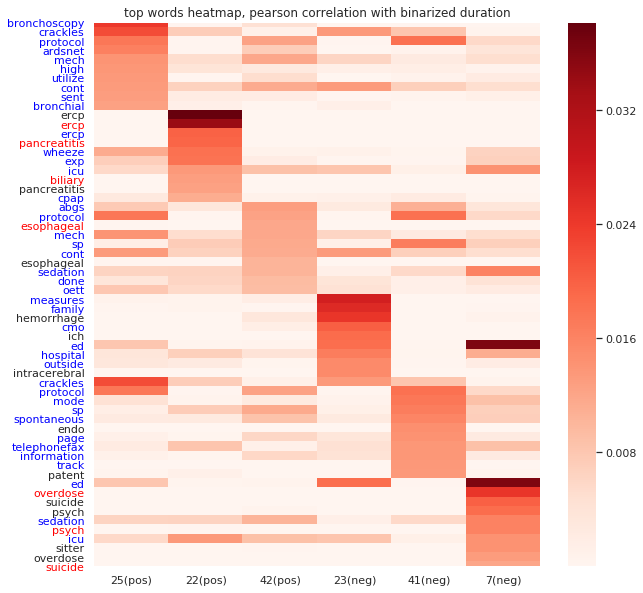

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 2:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if bi_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
    elif bi_top_types[idx] == 3:
        ax.get_yticklabels()[idx].set_color("blue")
plt.title('top words heatmap, pearson correlation with binarized duration')

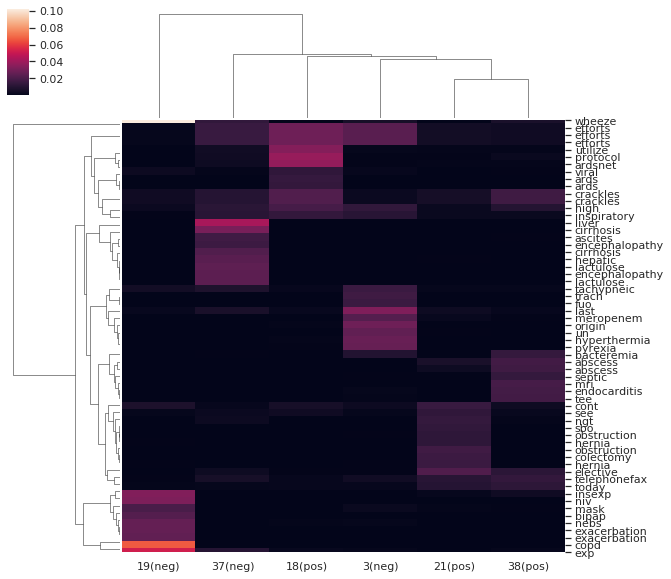

In [89]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 2:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)

## Try using cosine similarity instead of Pearson correlation
Because the correlation might not be linear

In [37]:
def cosine(series_1, series_2):
    return np.dot(series_1, series_2) / (np.linalg.norm(series_1, ord=2) * np.linalg.norm(series_2, ord=2))

In [247]:
cos = normed_mixtures.corrwith(duration, method=cosine)

In [248]:
cos.shape

(48,)

In [249]:
duration.shape

(1233,)

In [250]:
cos_sorted = cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

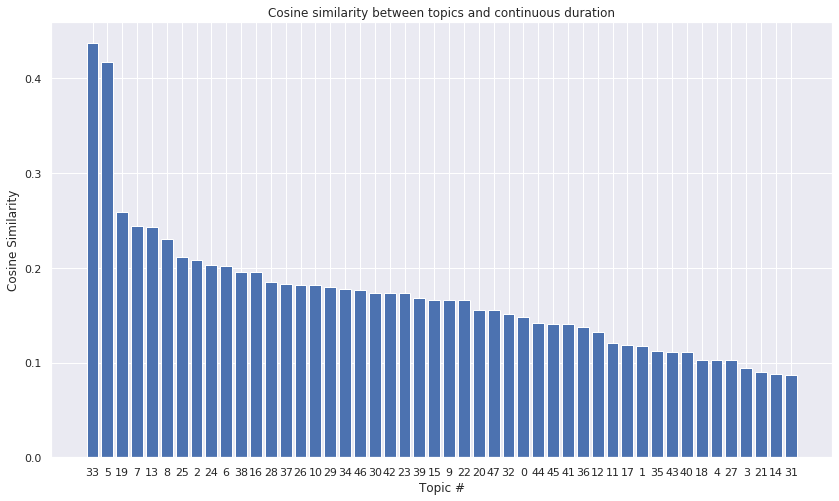

In [251]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_sorted)), height=cos_sorted)
plt.title('Cosine similarity between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_sorted)), cos_sorted.index)
plt.ylabel('Cosine Similarity')

### Death

In [296]:
cos_death_corr = normed_mixtures.corrwith(death, method=cosine)

In [297]:
cos_death_corr_sorted = cos_death_corr.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

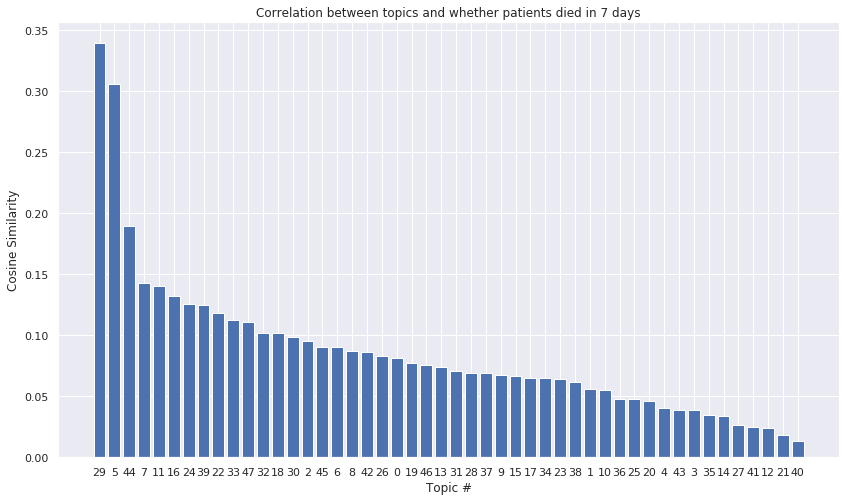

In [298]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_death_corr)), height=cos_death_corr_sorted)
plt.title('Correlation between topics and whether patients died in 7 days')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_death_corr)), cos_death_corr_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [252]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [253]:
cos_top_topics = find_max_n(list(cos), 6)

## Extract top words in those top topics

In [254]:
cos_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in cos_top_topics]

In [255]:
cos_top_phis_df = phis_df[cos_cols]

In [256]:
cos_top_phis_df.head()

,CATEGORY,WORD_ID,33,5,19,7,13,8
0,1,0,0.000006,0.000004,0.000028,7.552510e-06,0.000012,0.000387
1,1,1,0.000002,0.000002,0.000002,1.084400e-06,0.000160,0.000002
2,1,2,0.000002,0.000001,0.000110,7.926560e-07,0.000045,0.000015
3,1,3,0.000003,0.000002,0.000001,1.086890e-06,0.000002,0.000062
4,1,4,0.000004,0.000057,0.000125,1.782350e-06,0.000006,0.000016


In [257]:
cos_top_words_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in cos_top_topics]
cos_top_words = []
for sublist in cos_top_words_bytopic:
    for word in sublist:
        cos_top_words.append(word)
cos_top_types_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in cos_top_topics]
cos_top_types = []
for sublist in cos_top_types_bytopic:
    for cat in sublist:
        cos_top_types.append(cat)

In [258]:
cos_word_topic_matrix = pd.DataFrame(columns=cos_top_phis_df.keys())
for idx in range(len(cos_top_types)):
    cat = cos_top_types[idx]
    word_id = cos_top_words[idx]
    cos_word_topic_matrix = pd.concat([cos_word_topic_matrix, cos_top_phis_df[(cos_top_phis_df['CATEGORY'] == cat) & \
                                                                           (cos_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [259]:
cos_word_topic_matrix.head()

,CATEGORY,WORD_ID,33,5,19,7,13,8
0,2,6444,0.047619,6.100600e-04,6.932310e-07,8.353150e-07,0.000002,0.000001
1,2,2817,0.037752,2.119930e-06,3.909530e-05,9.173310e-06,0.001523,0.000197
2,1,7756,0.027744,3.003530e-03,3.258330e-06,1.193890e-05,0.000029,0.000012
3,2,2632,0.020240,3.087690e-06,2.758360e-06,6.059390e-06,0.000547,0.000005
4,2,8836,0.016233,9.562540e-07,7.506020e-07,7.955440e-07,0.000002,0.000001


In [260]:
cos_yticklabels = []
for idx, word_id in enumerate(cos_top_words):
    vocab_df = vocab_dfs[cos_top_types[idx]]
    cos_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
cos_xticklabels = [str(topic) for topic in cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with continuous duration')

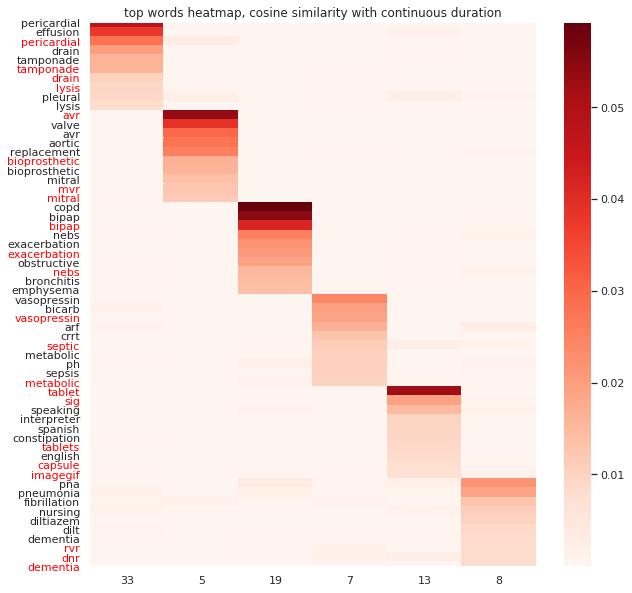

In [261]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 2:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if cos_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, cosine similarity with continuous duration')

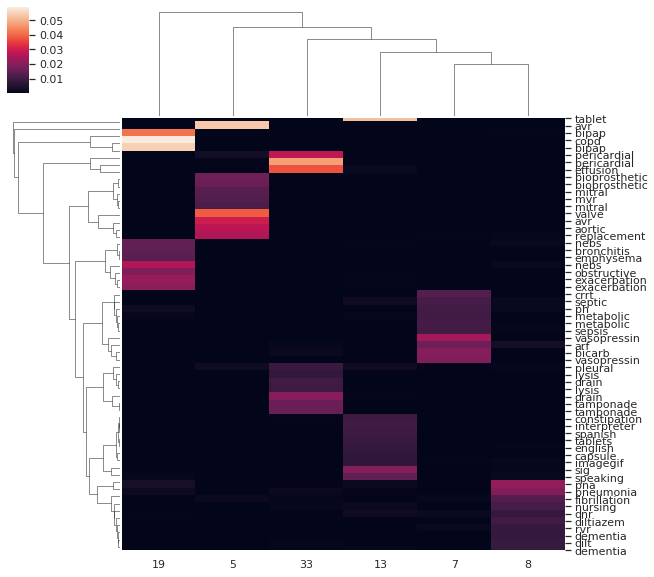

In [262]:
sns.set()
sns.clustermap(cos_word_topic_matrix.iloc[:, 2:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels)

### Try binarized

In [38]:
bi_cos = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method=cosine))

In [39]:
bi_cos_sorted = bi_cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

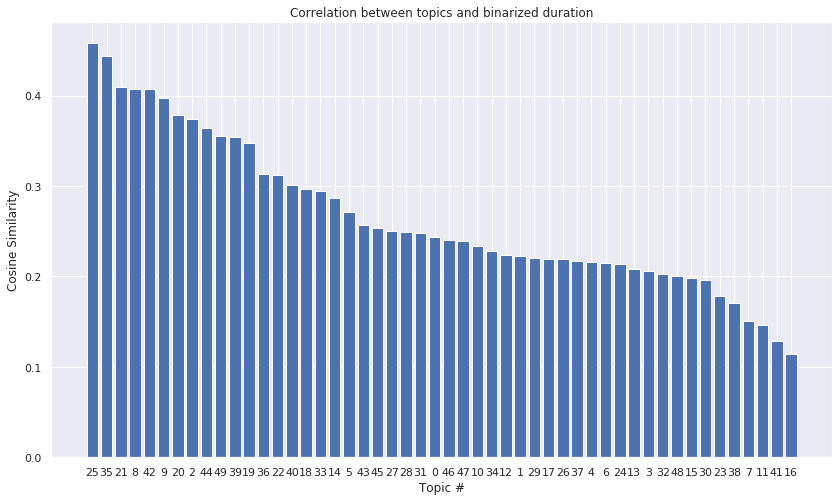

In [40]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(bi_cos_sorted)), height=bi_cos_sorted)
plt.title('Correlation between topics and binarized duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos_sorted)), bi_cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [41]:
bi_cos_top_topics = find_max_n(list(bi_cos), 6)

## Extract top words in those top topics

In [42]:
bi_cos_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in bi_cos_top_topics]

In [43]:
bi_cos_top_phis_df = phis_df[bi_cos_cols]

In [44]:
bi_cos_top_phis_df.head()

,CATEGORY,WORD_ID,25,35,21,8,42,9
0,1,0,5.284540e-04,0.000007,1.792540e-04,0.000102,0.000381,0.001292
1,1,1,2.308220e-06,0.000004,2.120790e-06,0.000159,0.000005,0.000131
2,1,2,8.374050e-07,0.000429,7.768270e-07,0.000118,0.000001,0.000082
3,1,3,1.880380e-06,0.000003,1.899610e-06,0.000012,0.000003,0.000003
4,1,4,6.855270e-06,0.000007,3.761240e-06,0.000006,0.000154,0.000006


In [45]:
bi_cos_top_words_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_words = []
for sublist in bi_cos_top_words_bytopic:
    for word in sublist:
        bi_cos_top_words.append(word)
bi_cos_top_types_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_types = []
for sublist in bi_cos_top_types_bytopic:
    for cat in sublist:
        bi_cos_top_types.append(cat)

In [46]:
bi_cos_word_topic_matrix = pd.DataFrame(columns=bi_cos_top_phis_df.keys())
for idx in range(len(bi_cos_top_types)):
    cat = bi_cos_top_types[idx]
    word_id = bi_cos_top_words[idx]
    bi_cos_word_topic_matrix = pd.concat([bi_cos_word_topic_matrix, bi_cos_top_phis_df[(bi_cos_top_phis_df['CATEGORY'] == cat) & \
                                                                           (bi_cos_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [47]:
bi_cos_word_topic_matrix.head()

,CATEGORY,WORD_ID,25,35,21,8,42,9
0,3,222,0.024267,0.008029,0.000127,0.006893,0.004473,0.000331
1,3,352,0.022159,0.008675,0.018745,0.022021,0.001054,0.007011
2,3,1155,0.017531,0.000301,0.014052,0.004556,0.012447,0.000435
3,3,110,0.016422,0.000218,0.011530,0.004672,0.007273,0.000300
4,3,863,0.014030,0.002229,0.000303,0.001170,0.011775,0.004813


In [48]:
bi_cos_yticklabels = []
for idx, word_id in enumerate(bi_cos_top_words):
    vocab_df = vocab_dfs[bi_cos_top_types[idx]]
    bi_cos_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
bi_cos_xticklabels = [str(topic) for topic in bi_cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with binarized duration')

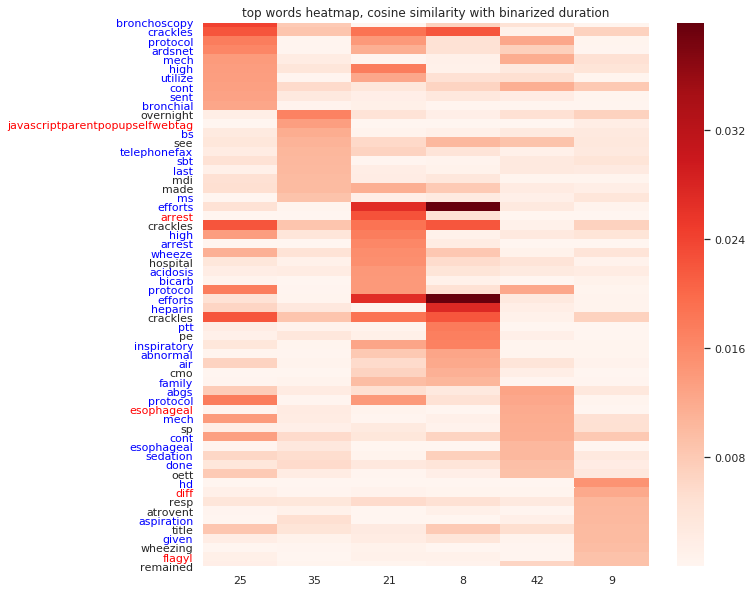

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_cos_word_topic_matrix.iloc[:, 2:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if bi_cos_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
    elif bi_top_types[idx] == 3:
        ax.get_yticklabels()[idx].set_color("blue")
plt.title('top words heatmap, cosine similarity with binarized duration')

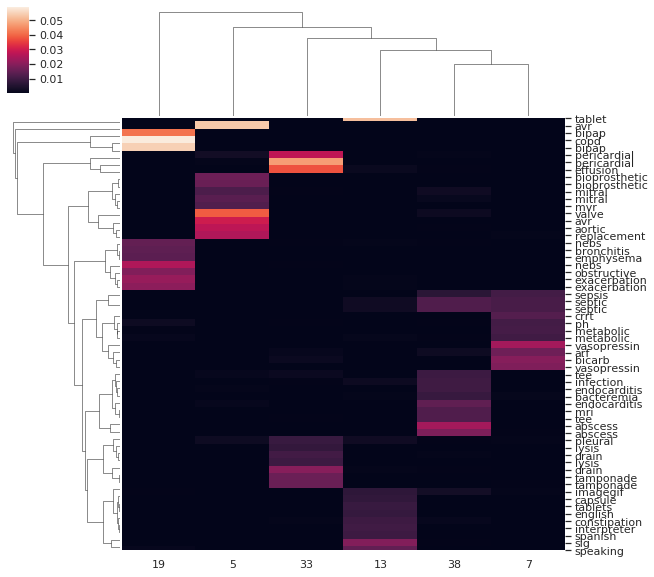

In [275]:
sns.set()
sns.clustermap(bi_cos_word_topic_matrix.iloc[:, 2:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels)

## Correlation for death

In [7]:
data_path = r'/home/mcb/users/pnair6/mimic/data/data_files_14Nov'

In [8]:
fold_note_dfs = [pd.read_csv(os.path.join(data_path, 'fold' + str(idx), 'train.csv')) for idx in range(1, 6)]

In [9]:
fold_note_dfs[0].head()

,Unnamed: 0,HADM_ID,CHARTTIME,TEXT,CATEGORY,ICUSTAY_ID,ADMITTIME,DISCHTIME,FIRST_VENT_STARTTIME,DOD,COHORT,DAYS_UNTIL_DEATH,DEATH,DEATH_90,Label,# of tokens
0,0,132663.0,2138-09-12 16:09:00,chief complaint: respiratory failure i saw and...,Physician,249584,2138-08-25 17:58:00,2138-10-03 13:27:00,2138-09-12 11:00:00,2138-10-03 00:00:00,0,20.541667,0,1,0,992
1,1,132663.0,2138-09-12 16:13:00,chief complaint: respiratory distress hpi: yea...,Physician,249584,2138-08-25 17:58:00,2138-10-03 13:27:00,2138-09-12 11:00:00,2138-10-03 00:00:00,0,20.541667,0,1,0,1520
2,2,132663.0,2138-09-13 04:53:00,demographics day of intubation: day of mechani...,Respiratory,249584,2138-08-25 17:58:00,2138-10-03 13:27:00,2138-09-12 11:00:00,2138-10-03 00:00:00,0,20.541667,0,1,0,231
3,3,132663.0,2138-09-13 03:14:00,year-old female with hypertension admitted wit...,Nursing,249584,2138-08-25 17:58:00,2138-10-03 13:27:00,2138-09-12 11:00:00,2138-10-03 00:00:00,0,20.541667,0,1,0,164
4,4,132663.0,2138-09-13 03:14:00,year-old female with hypertension admitted wit...,Nursing,249584,2138-08-25 17:58:00,2138-10-03 13:27:00,2138-09-12 11:00:00,2138-10-03 00:00:00,0,20.541667,0,1,0,279


In [10]:
death_dfs = [fold_note_df[['HADM_ID', 'DEATH']] for fold_note_df in fold_note_dfs]

In [20]:
death_df = pd.concat(death_dfs, ignore_index=True).drop_duplicates().reset_index(drop=True)
death = death_df['DEATH'].astype(int)

In [21]:
death_df

,HADM_ID,DEATH
0,132663.0,0
1,178961.0,0
2,170269.0,0
3,148625.0,0
4,135916.0,0
...,...,...
1386,115993.0,1
1387,182849.0,1
1388,130887.0,0
1389,194269.0,0


In [22]:
death

0       0
1       0
2       0
3       0
4       0
       ..
1386    1
1387    1
1388    0
1389    0
1390    0
Name: DEATH, Length: 1391, dtype: int64

In [23]:
death_corr = normed_mixtures.apply(lambda mixture: mixture.corr(death, method='pearson'))

In [24]:
death_corr_sorted = death_corr.sort_values(ascending=False)

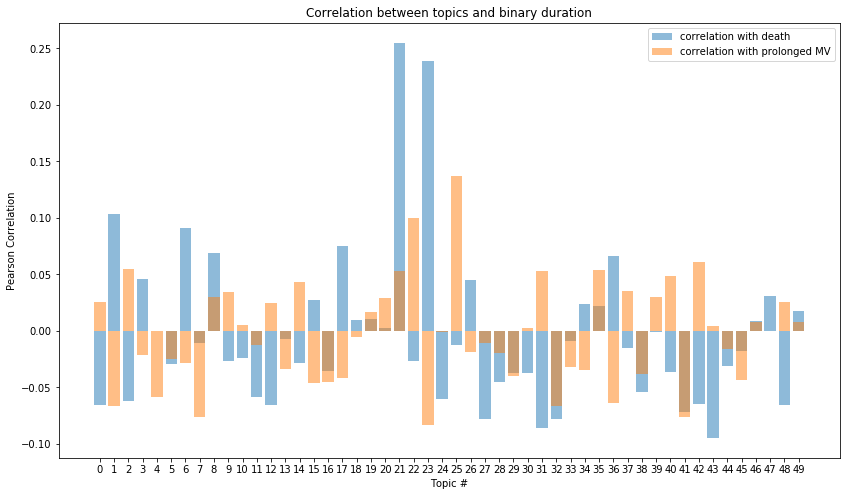

In [25]:
# plt.subplot(1, 2, 1)
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(death_corr)), height=death_corr, label='correlation with death', alpha=0.5)
plt.title('Correlation between topics and whether patients died in 7 days')
plt.xlabel('Topic #')
plt.xticks(range(len(death_corr)), death_corr.index)
plt.ylabel('Pearson Correlation')
# plt.subplot(1, 2, 2)
# plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr, label='correlation with prolonged MV', alpha=0.5)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr.index)
plt.ylabel('Pearson Correlation')
plt.legend()

### cosine

In [62]:
cos_death_corr = normed_mixtures.apply(lambda mixture: mixture.corr(death, method=cosine))

In [63]:
cos_death_corr_sorted = cos_death_corr.sort_values(ascending=False)

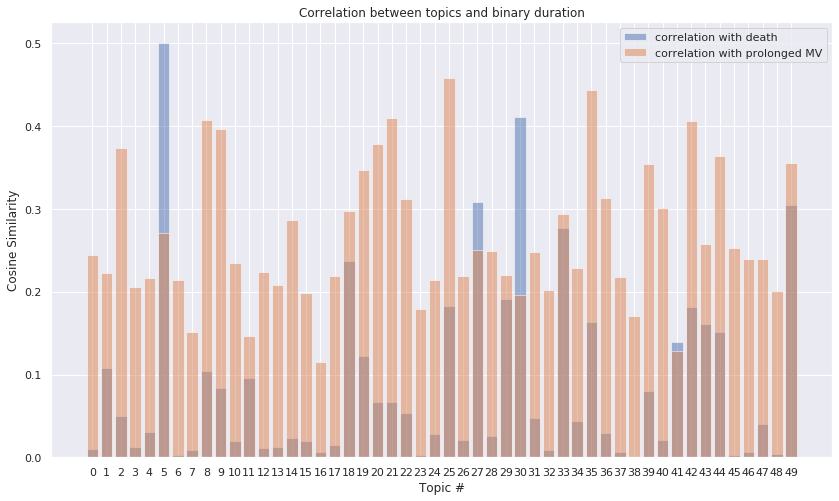

In [64]:
# plt.subplot(1, 2, 1)
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_death_corr)), height=cos_death_corr, label='correlation with death', alpha=0.5)
plt.title('Correlation between topics and whether patients died in 7 days')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_death_corr)), cos_death_corr.index)
plt.ylabel('Cosine Similarity')
# plt.subplot(1, 2, 2)
# plt.figure(figsize=(8,6))
plt.bar(x=range(len(bi_cos)), height=bi_cos, label='correlation with prolonged MV', alpha=0.5)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos)), bi_cos.index)
plt.ylabel('Cosine Similarity')
plt.legend()

### get top patients associated with death

In [65]:
cos_death_corr_sorted.index

Index(['5', '30', '27', '49', '33', '18', '29', '25', '42', '35', '43', '44',
       '41', '19', '1', '8', '11', '9', '39', '21', '20', '22', '2', '31',
       '34', '47', '4', '36', '24', '28', '14', '40', '26', '15', '10', '17',
       '13', '3', '12', '0', '32', '7', '46', '37', '16', '48', '6', '23',
       '45', '38'],
      dtype='object')

In [66]:
death_corr_sorted.index

Index(['5', '30', '27', '49', '33', '18', '29', '41', '25', '42', '43', '11',
       '35', '1', '44', '19', '8', '22', '24', '31', '47', '39', '34', '37',
       '15', '12', '48', '13', '4', '10', '9', '20', '23', '38', '16', '45',
       '40', '14', '21', '26', '28', '0', '3', '36', '17', '7', '46', '2', '6',
       '32'],
      dtype='object')

In [67]:
normed_mixtures.sort_values(by='5', ascending=False).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1385,0.060142,0.015380,0.000330,0.006656,0.008597,0.208703,0.000569,0.000601,0.018837,0.154357,...,0.007551,0.002959,0.022246,0.004801,0.047608,0.026053,0.017360,0.000249,0.001707,0.020019
304,0.005286,0.025979,0.005564,0.000916,0.009523,0.204534,0.111267,0.010095,0.022110,0.004608,...,0.039236,0.002401,0.008695,0.018785,0.020555,0.001751,0.000922,0.006404,0.007914,0.003523
1243,0.062331,0.002556,0.015634,0.000890,0.001372,0.199180,0.001284,0.002295,0.105887,0.006439,...,0.000378,0.001690,0.004624,0.001286,0.002132,0.001850,0.000348,0.036821,0.000865,0.000621
1167,0.045824,0.000312,0.088951,0.001396,0.021148,0.191760,0.000153,0.003296,0.006410,0.001421,...,0.006381,0.000171,0.011217,0.159576,0.063127,0.001782,0.004812,0.000559,0.000259,0.053033
294,0.160054,0.001384,0.000973,0.022434,0.031000,0.181747,0.000109,0.000418,0.007795,0.003089,...,0.019789,0.027904,0.037414,0.001112,0.022030,0.000502,0.000050,0.009374,0.005401,0.001699


In [68]:
death_df_reset = death_df.reset_index(drop=True)

In [69]:
death_df

,HADM_ID,DEATH
0,132663.0,0
29,178961.0,0
45,170269.0,0
70,148625.0,0
94,135916.0,0
...,...,...
34313,115993.0,1
34348,182849.0,1
34380,130887.0,0
34404,194269.0,0


In [70]:
death_df_reset

,HADM_ID,DEATH
0,132663.0,0
1,178961.0,0
2,170269.0,0
3,148625.0,0
4,135916.0,0
...,...,...
1386,115993.0,1
1387,182849.0,1
1388,130887.0,0
1389,194269.0,0


In [71]:
top_hadm_ids = death_df_reset.iloc[normed_mixtures.sort_values(by='5', ascending=False).head().index]['HADM_ID']

In [72]:
top_hadm_ids

1385    117308.0
304     131907.0
1243    100336.0
1167    145724.0
294     167391.0
Name: HADM_ID, dtype: float64

In [73]:
death_df[death_df['HADM_ID'].isin(top_hadm_ids)]

,HADM_ID,DEATH
7428,167391.0,0
7723,131907.0,0
28899,145724.0,0
30797,100336.0,0
34271,117308.0,0


In [288]:
fold_note_df = pd.concat(fold_note_dfs, ignore_index=True)

In [336]:
fold_note_df[fold_note_df['HADM_ID'].isin(top_hadm_ids)]

,Unnamed: 0,HADM_ID,CHARTTIME,TEXT,CATEGORY,ICUSTAY_ID,ADMITTIME,DISCHTIME,FIRST_VENT_STARTTIME,DOD,COHORT,DAYS_UNTIL_DEATH,DEATH,DEATH_90,Label,# of tokens
7428,430,167391.0,2156-03-02 18:15:00,demographics day of intubation: day of mechani...,Respiratory,217851,2156-02-28 17:21:00,2156-03-09 14:49:00,2156-03-01 13:35:00,2156-04-12 00:00:00,0,41.434028,0,1,0,148
7429,431,167391.0,2156-03-02 02:49:00,demographics day of intubation: day of mechani...,Respiratory,217851,2156-02-28 17:21:00,2156-03-09 14:49:00,2156-03-01 13:35:00,2156-04-12 00:00:00,0,41.434028,0,1,0,167
7430,432,167391.0,2156-03-02 12:27:00,hpi: y russian speaking m brought by ambulance...,Nursing,217851,2156-02-28 17:21:00,2156-03-09 14:49:00,2156-03-01 13:35:00,2156-04-12 00:00:00,0,41.434028,0,1,0,391
7431,433,167391.0,2156-03-03 06:46:00,"hip fracture (femoral neck fracture, femur) as...",Nursing,217851,2156-02-28 17:21:00,2156-03-09 14:49:00,2156-03-01 13:35:00,2156-04-12 00:00:00,0,41.434028,0,1,0,197
7432,434,167391.0,2156-03-02 06:25:00,demographics day of intubation: day of mechani...,Respiratory,217851,2156-02-28 17:21:00,2156-03-09 14:49:00,2156-03-01 13:35:00,2156-04-12 00:00:00,0,41.434028,0,1,0,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34308,6908,117308.0,2167-10-10 02:13:00,"ms. is a y.o. f with cad s/p imi, chf with ef ...",Nursing,255154,2167-10-07 23:43:00,2167-10-16 17:05:00,2167-10-09 12:00:00,2167-12-07 00:00:00,0,58.500000,0,1,0,607
34309,6909,117308.0,2167-10-10 15:15:00,"ms. is a y.o. f with cad s/p imi, chf with ef ...",Nursing,255154,2167-10-07 23:43:00,2167-10-16 17:05:00,2167-10-09 12:00:00,2167-12-07 00:00:00,0,58.500000,0,1,0,472
34310,6910,117308.0,2167-10-10 08:02:00,chief complaint: i saw and examined the patien...,Physician,255154,2167-10-07 23:43:00,2167-10-16 17:05:00,2167-10-09 12:00:00,2167-12-07 00:00:00,0,58.500000,0,1,0,1078
34311,6911,117308.0,2167-10-11 08:00:00,chief complaint: i saw and examined the patien...,Physician,255154,2167-10-07 23:43:00,2167-10-16 17:05:00,2167-10-09 12:00:00,2167-12-07 00:00:00,0,58.500000,0,1,0,410
